# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We aim to understand the factors influencing the price of used cars. The primary objective is to provide actionable insights for a used car dealership to optimize their inventory and pricing strategies.

#### Business Objectives:
1. **Identify Key Price Drivers:**
   - Determine the most significant factors that influence the price of a used car.

2. **Optimize Inventory:**
   - Identify which car features should be prioritized in inventory to maximize profitability.

3. **Pricing Strategy:**
   - Develop a strategy to set competitive and profitable prices for cars.

4. **Market Positioning:**
   - Compare the dealership's pricing with market averages for similar vehicles.

5. **Sales Strategy:**
   - Understand which types of cars are likely to sell faster based on features and pricing.

6. **Customer Preferences:**
   - Determine the car features most valued by customers in different market segments.

#### Business Questions:
1. **Feature Impact:**
   - How do factors like mileage, age, make, model, and condition of the car impact its price?

2. **Geographic Influence:**
   - Does the location of the dealership affect car prices?

3. **Seasonal Trends:**
   - Are there seasonal trends in used car prices that the dealership can leverage?

4. **Market Demand:**
   - Which makes and models are in highest demand and how does this affect their pricing?

 
5**Customer Preferences:**
   - Which car features are most valued by customers in different market segments?

Addressing these objectives and questions will provide valuable insights that can help the dealership make data-driven decisions to enhance its operations and increase profitability.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In the Data Understanding phase, we aim to explore the dataset to gain insights and identify any potential issues that need to be addressed before data preparation. This involves loading the dataset, checking its structure, summarizing key statistics, and identifying any missing or anomalous data.

In [57]:
!pip install pandas matplotlib seaborn scikit-learn lightgbm xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd

# Load the dataset
data_path = 'data/raw/vehicles.csv'
vehicles_df = pd.read_csv(data_path)

# Display the first few rows
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [59]:
# Check column names
vehicles_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [60]:
# Summary statistics
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [61]:
# Check for missing values
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [62]:
# Check data types
vehicles_df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

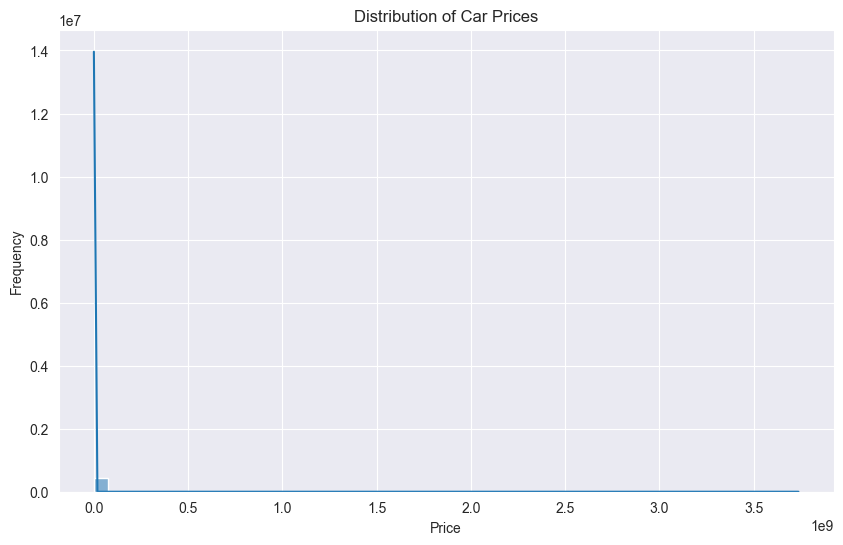

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

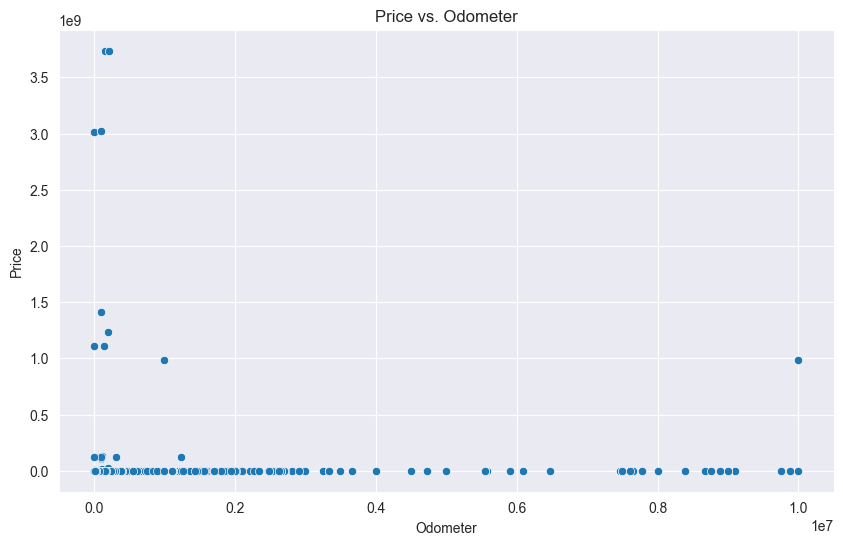

In [64]:
# Scatter plot of price vs. odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=vehicles_df)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

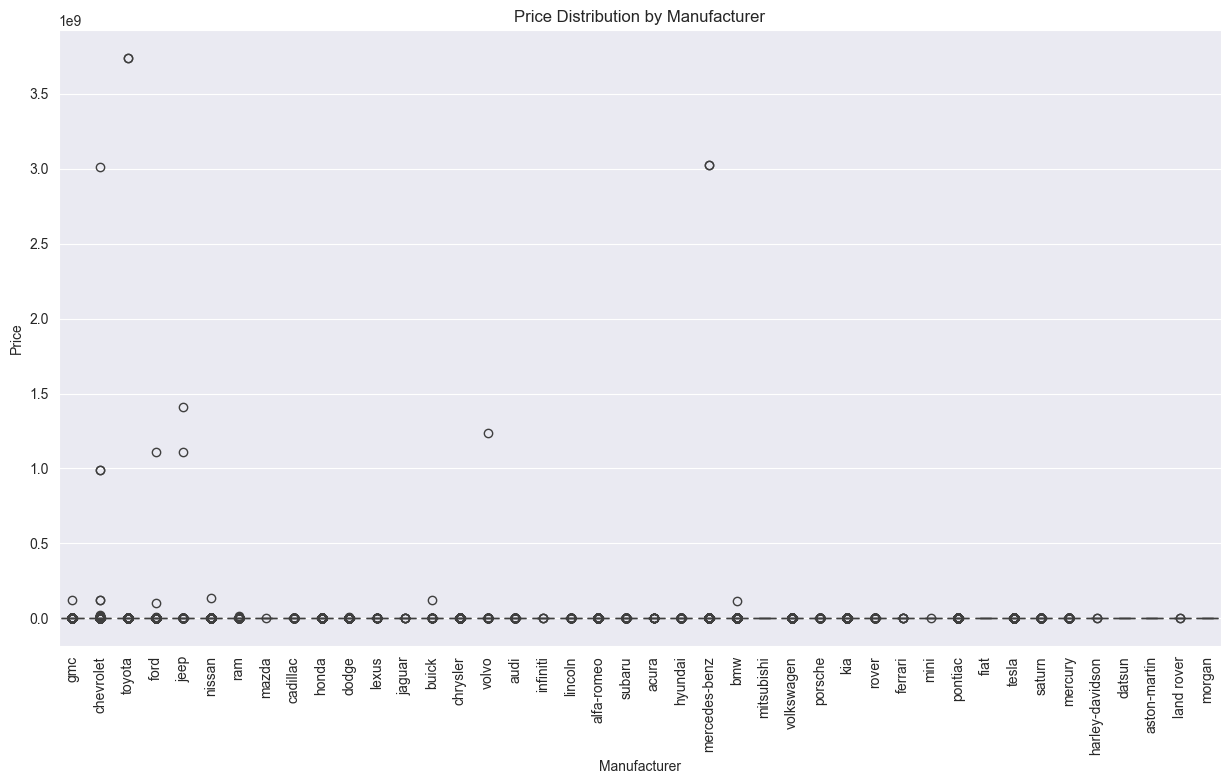

In [65]:
# Box plot of price vs. manufacturer
plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=vehicles_df)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [66]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

The dataset has a significant number of missing values in several columns. 

VIN and title_status is insignificant for our analysis and can be dropped.

In [67]:
vehicles_df = vehicles_df.drop(columns=['VIN'])
vehicles_df = vehicles_df.drop(columns=['title_status'])

Relying on the assumption that each model is typically associated with a specific manufacturer.  We can attempt to fill in missing values for the manufacturer column based on the model column.  

In [68]:
# Create a lookup table from the non-missing manufacturer data
manufacturer_lookup_table = vehicles_df.dropna(subset=['manufacturer'])[['model', 'manufacturer']]
manufacturer_lookup_table = manufacturer_lookup_table.drop_duplicates()

# Convert the lookup table to a dictionary for fast lookup
manufacturer_lookup_dict = manufacturer_lookup_table.set_index('model').to_dict()['manufacturer']

In [69]:
def fill_manufacturer(row):
    if pd.isnull(row['manufacturer']):
        return manufacturer_lookup_dict.get(row['model'], row['manufacturer'])
    else:
        return row['manufacturer']

# Apply the function to fill missing manufacturer values
vehicles_df['manufacturer'] = vehicles_df.apply(fill_manufacturer, axis=1)

In [70]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     16778
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [71]:
# Drop records with missing manufacturer, model, or year
vehicles_df = vehicles_df.dropna(subset=['manufacturer', 'model', 'year'])

# Verify the remaining missing values
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       164577
cylinders       167254
fuel              2553
odometer          4138
transmission      2271
drive           121267
size            290989
type             84438
paint_color     121534
state                0
dtype: int64

We can also fill missing values for the fuel based on the available information for year, manufacturer and model.

In [72]:
# Create a lookup table from the non-missing fuel data
fuel_lookup_table = vehicles_df.dropna(subset=['fuel'])[['year', 'manufacturer', 'model', 'fuel']]
fuel_lookup_table = fuel_lookup_table.drop_duplicates()

# Convert the lookup table to a dictionary for fast lookup
fuel_lookup_dict = fuel_lookup_table.set_index(['year', 'manufacturer', 'model']).to_dict()['fuel']

In [73]:
def fill_fuel(row):
    key = (row['year'], row['manufacturer'], row['model'])
    if pd.isnull(row['fuel']):
        return fuel_lookup_dict.get(key, row['fuel'])
    else:
        return row['fuel']

# Apply the function to fill missing fuel values
vehicles_df['fuel'] = vehicles_df.apply(fill_fuel, axis=1)

In [74]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       164577
cylinders       167254
fuel              1408
odometer          4138
transmission      2271
drive           121267
size            290989
type             84438
paint_color     121534
state                0
dtype: int64

We can attempt to infer the missing values for the cylinders column based on the available information for year, manufacturer, and model. This can be done using a lookup table

In [75]:
# Clean the 'cylinders' data
vehicles_df['cylinders'] = vehicles_df['cylinders'].str.extract('(\d+)').astype(float)

In [76]:
# Create a lookup table from the non-missing cylinder data
lookup_table = vehicles_df.dropna(subset=['cylinders'])[['year', 'manufacturer', 'model', 'cylinders', 'fuel']]
lookup_table = lookup_table.drop_duplicates()

# Convert the lookup table to a dictionary for fast lookup
lookup_dict = lookup_table.set_index(['year', 'manufacturer', 'model']).to_dict()['cylinders']

# Create a secondary lookup table based on 'fuel'
fuel_lookup_table = lookup_table.groupby('fuel')['cylinders'].agg(lambda x: x.mode()[0]).reset_index()
fuel_lookup_dict = fuel_lookup_table.set_index('fuel').to_dict()['cylinders']


In [77]:
def fill_cylinders(row):
    key = (row['year'], row['manufacturer'], row['model'])
    if pd.isnull(row['cylinders']):
        cylinders = lookup_dict.get(key, fuel_lookup_dict.get(row['fuel'], row['cylinders']))
        if pd.notnull(cylinders):
            if cylinders % 2 != 0:
                # Ensure cylinders is a multiple of 2
                cylinders = round(cylinders / 2) * 2
            return cylinders
    return row['cylinders']

# Apply the function to fill missing cylinders values
vehicles_df['cylinders'] = vehicles_df.apply(fill_cylinders, axis=1)

# Verify the remaining missing values in the cylinders column
vehicles_df['cylinders'].isnull().sum()


639

In [78]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       164577
cylinders          639
fuel              1408
odometer          4138
transmission      2271
drive           121267
size            290989
type             84438
paint_color     121534
state                0
dtype: int64

We can makde some assumptions about condition.

In [79]:
# Create bins for mileage to simplify the lookup
vehicles_df['mileage_bin'] = pd.cut(vehicles_df['odometer'], bins=10, labels=False)

# Create a lookup table from the non-missing condition data
condition_lookup_table = vehicles_df.dropna(subset=['condition'])[['year', 'mileage_bin', 'manufacturer', 'model', 'condition']]
condition_lookup_table = condition_lookup_table.drop_duplicates()

# Convert the lookup table to a dictionary for fast lookup
condition_lookup_dict = condition_lookup_table.set_index(['year', 'mileage_bin', 'manufacturer', 'model']).to_dict()['condition']

# Create additional lookup tables for fallback strategies
condition_lookup_table_ym = condition_lookup_table.groupby(['year', 'mileage_bin'])['condition'].agg(lambda x: x.mode()[0]).reset_index()
condition_lookup_dict_ym = condition_lookup_table_ym.set_index(['year', 'mileage_bin']).to_dict()['condition']

condition_lookup_table_y = condition_lookup_table.groupby('year')['condition'].agg(lambda x: x.mode()[0]).reset_index()
condition_lookup_dict_y = condition_lookup_table_y.set_index('year').to_dict()['condition']


In [80]:
def fill_condition(row):
    key_full = (row['year'], row['mileage_bin'], row['manufacturer'], row['model'])
    key_ym = (row['year'], row['mileage_bin'])
    key_y = row['year']

    if pd.isnull(row['condition']):
        return condition_lookup_dict.get(key_full, condition_lookup_dict_ym.get(key_ym, condition_lookup_dict_y.get(key_y, row['condition'])))
    else:
        return row['condition']

# Apply the function to fill missing condition values
vehicles_df['condition'] = vehicles_df.apply(fill_condition, axis=1)

# Drop the mileage_bin column as it was only needed for imputation
vehicles_df = vehicles_df.drop(columns=['mileage_bin'])


In [81]:

# Verify that there are no more missing values in the condition column
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition           14
cylinders          639
fuel              1408
odometer          4138
transmission      2271
drive           121267
size            290989
type             84438
paint_color     121534
state                0
dtype: int64

In [82]:
vehicles_df = vehicles_df.dropna(subset=['condition'])

In [83]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders          639
fuel              1408
odometer          4126
transmission      2259
drive           121253
size            290975
type             84436
paint_color     121520
state                0
dtype: int64

In [84]:
# Create a lookup table from the non-missing fuel data
fuel_lookup_table = vehicles_df.dropna(subset=['fuel'])[['manufacturer', 'model', 'year', 'fuel']]
fuel_lookup_table = fuel_lookup_table.drop_duplicates()

# Convert the lookup table to a dictionary for fast lookup
fuel_lookup_dict = fuel_lookup_table.set_index(['manufacturer', 'model', 'year']).to_dict()['fuel']

In [85]:
def fill_fuel(row):
    key = (row['manufacturer'], row['model'])
    if pd.isnull(row['fuel']):
        return fuel_lookup_dict.get(key, row['fuel'])
    else:
        return row['fuel']

# Apply the function to fill missing fuel values
vehicles_df['fuel'] = vehicles_df.apply(fill_fuel, axis=1)

# Verify the remaining missing values in the fuel column
vehicles_df['fuel'].isnull().sum()

1408

In [86]:
missing_fuel_records = vehicles_df[vehicles_df['fuel'].isnull()]
missing_fuel_records

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
225,7316396026,birmingham,20995,2011.0,chevrolet,silverado 1500 ltz crew cab 4wd,excellent,NaN,NaN,137701.0,automatic,4wd,NaN,pickup,NaN,al
226,7316395026,birmingham,25995,2015.0,chevrolet,silverado 1500 lt crew cab 4wd,excellent,NaN,NaN,151681.0,automatic,4wd,NaN,pickup,NaN,al
227,7316393935,birmingham,31995,2014.0,chevrolet,silverado 1500 2lt crew cab long box 4wd,excellent,NaN,NaN,66738.0,automatic,4wd,NaN,pickup,NaN,al
1343,7306292125,birmingham,19995,2011.0,jeep,wrangler right hand drive,excellent,NaN,NaN,87857.0,manual,4wd,NaN,SUV,NaN,al
1569,7303800718,birmingham,9995,2011.0,toyota,prius prius v,excellent,NaN,NaN,104087.0,other,fwd,NaN,hatchback,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421647,7304269747,madison,5480,2007.0,honda,accord ex-l v-6 coupe at 5-speed automatic,excellent,NaN,NaN,153187.0,automatic,fwd,NaN,coupe,NaN,wi
421648,7304259777,madison,14495,2013.0,audi,q5 3.0 quattro premium 6-speed automatic,excellent,NaN,NaN,114112.0,automatic,4wd,NaN,SUV,NaN,wi
421811,7303278055,madison,6895,2009.0,nissan,murano sl awd cvt,excellent,NaN,NaN,134933.0,other,4wd,NaN,SUV,NaN,wi
421812,7303268495,madison,6780,2007.0,ford,escape xlt 4wd 2.3l 4-speed automatic,excellent,NaN,NaN,66283.0,automatic,4wd,NaN,SUV,NaN,wi


In [87]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders          639
fuel              1408
odometer          4126
transmission      2259
drive           121253
size            290975
type             84436
paint_color     121520
state                0
dtype: int64

In [88]:
# Create a lookup table from the non-missing odometer data
odometer_lookup_table = vehicles_df.dropna(subset=['odometer'])[['condition', 'year', 'odometer']]
odometer_lookup_table = odometer_lookup_table.groupby(['condition', 'year'])['odometer'].median().reset_index()

# Convert the lookup table to a dictionary for fast lookup
odometer_lookup_dict = odometer_lookup_table.set_index(['condition', 'year']).to_dict()['odometer']

In [89]:
def fill_odometer(row):
    key = (row['condition'], row['year'])
    if pd.isnull(row['odometer']):
        return odometer_lookup_dict.get(key, row['odometer'])
    else:
        return row['odometer']

# Apply the function to fill missing odometer values
vehicles_df['odometer'] = vehicles_df.apply(fill_odometer, axis=1)

# Verify the remaining missing values in the odometer column
vehicles_df['odometer'].isnull().sum()

0

In [90]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders          639
fuel              1408
odometer             0
transmission      2259
drive           121253
size            290975
type             84436
paint_color     121520
state                0
dtype: int64

Let's clean upd the drive column. 

In [91]:
# Create a lookup table from the non-missing drive data
drive_lookup_table = vehicles_df.dropna(subset=['drive'])[['year', 'manufacturer', 'model', 'drive']]
drive_lookup_table = drive_lookup_table.drop_duplicates()

# Convert the lookup table to dictionaries for fast lookup
drive_lookup_dict = drive_lookup_table.set_index(['year', 'manufacturer', 'model']).to_dict()['drive']
drive_fallback_lookup_dict = drive_lookup_table.groupby(['manufacturer', 'model'])['drive'].agg(lambda x: x.mode()[0]).to_dict()

In [92]:

def fill_drive(row):
    key = (row['year'], row['manufacturer'], row['model'])
    fallback_key = (row['manufacturer'], row['model'])
    if pd.isnull(row['drive']):
        drive = drive_lookup_dict.get(key, drive_fallback_lookup_dict.get(fallback_key, row['drive']))
        return drive
    else:
        return row['drive']

# Apply the function to fill missing drive values
vehicles_df['drive'] = vehicles_df.apply(fill_drive, axis=1)

# Verify the remaining missing values in the drive column
vehicles_df['drive'].isnull().sum()

19505

Let's clean up the size column. 

In [93]:
# Create a lookup table from the non-missing size data
size_lookup_table = vehicles_df.dropna(subset=['size'])[['year', 'manufacturer', 'model', 'size']]
size_lookup_table = size_lookup_table.drop_duplicates()

# Convert the lookup table to dictionaries for fast lookup
size_lookup_dict = size_lookup_table.set_index(['year', 'manufacturer', 'model']).to_dict()['size']
size_fallback_lookup_dict = size_lookup_table.groupby(['manufacturer', 'model'])['size'].agg(lambda x: x.mode()[0]).to_dict()

In [94]:
def fill_size(row):
    key = (row['year'], row['manufacturer'], row['model'])
    fallback_key = (row['manufacturer'], row['model'])
    if pd.isnull(row['size']):
        drive = drive_lookup_dict.get(key, drive_fallback_lookup_dict.get(fallback_key, row['size']))
        return drive
    else:
        return row['size']

# Apply the function to fill missing size values
vehicles_df['size'] = vehicles_df.apply(fill_size, axis=1)

# Verify the remaining missing values in the size column
vehicles_df['size'].isnull().sum()

19131

Let's clean up the type column.

In [95]:
# Create a lookup table from the non-missing type data
type_lookup_table = vehicles_df.dropna(subset=['type'])[['year', 'manufacturer', 'model', 'type']]
type_lookup_table = type_lookup_table.drop_duplicates()

# Convert the lookup table to dictionaries for fast lookup
type_lookup_dict = type_lookup_table.set_index(['year', 'manufacturer', 'model']).to_dict()['type']
type_fallback_lookup_dict = type_lookup_table.groupby(['manufacturer', 'model'])['type'].agg(lambda x: x.mode()[0]).to_dict()


In [96]:

def fill_type(row):
    key = (row['year'], row['manufacturer'], row['model'])
    fallback_key = (row['manufacturer'], row['model'])
    if pd.isnull(row['type']):
        type = type_lookup_dict.get(key, type_fallback_lookup_dict.get(fallback_key, row['type']))
        return type
    else:
        return row['type']

# Apply the function to fill missing type values
vehicles_df['type'] = vehicles_df.apply(fill_type, axis=1)

# Verify the remaining missing values in the type column
vehicles_df['type'].isnull().sum()

6648

Let's clean up remaining records that have missing values.

In [97]:
vehicles_df.isnull().sum()

vehicles_df = vehicles_df.dropna()

vehicles_df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [98]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,  RandomizedSearchCV, HalvingRandomSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
import numpy as np

In [99]:
# Remove outliers in the target variable
vehicles_df = vehicles_df[vehicles_df['price'] < vehicles_df['price'].quantile(0.95)]

In [100]:
categorical_cols = ['manufacturer', 'model', 'condition', 'fuel',  'transmission', 'drive', 'size', 'type', 'paint_color']
numerical_cols = ['year', 'odometer', 'cylinders']

In [101]:
# Split data into features and target variable
X = vehicles_df[categorical_cols + numerical_cols]
y = vehicles_df['price']

In [102]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [103]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Define the preprocessing and model pipeline
elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', ElasticNet())  # Apply ElasticNet regression
])

# Train the model on the training data
elastic_net_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_elastic = elastic_net_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse_elastic = mean_squared_error(y_test, y_pred_elastic)  # Calculate MSE
rmse_elastic = np.sqrt(mse_elastic)  # Calculate RMSE from MSE
r2_elastic = r2_score(y_test, y_pred_elastic)  # Calculate R^2 score

# Print the evaluation metrics
print(f'ElasticNet Regression: MSE={mse_elastic}, RMSE={rmse_elastic}, R^2={r2_elastic}')

ElasticNet Regression: MSE=88315248.57693706, RMSE=9397.619303682028, R^2=0.32443370892348944


In [105]:
# Define the preprocessing and model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', LinearRegression())  # Apply Linear Regression
])

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)  # Calculate R^2 score

# Print the evaluation metrics
print(f'Linear Regression: MSE={mse}, RMSE={rmse}, R^2={r2}')


Linear Regression: MSE=56330805.40651845, RMSE=7505.385093818868, R^2=0.5690982713060926


In [106]:
# Define the preprocessing and model pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', Ridge())  # Apply Ridge Regression
])

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  # Calculate MSE
rmse_ridge = np.sqrt(mse_ridge)  # Calculate RMSE from MSE
r2_ridge = r2_score(y_test, y_pred_ridge)  # Calculate R^2 score

# Print the evaluation metrics
print(f'Ridge Regression: MSE={mse_ridge}, RMSE={rmse_ridge}, R^2={r2_ridge}')


Ridge Regression: MSE=54389545.92470252, RMSE=7374.926841989859, R^2=0.5839479092709907


In [107]:
# Define the preprocessing and model pipeline
lgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', LGBMRegressor(random_state=42))  # Apply LightGBM Regressor
])

# Define the parameter grid for RandomizedSearchCV
param_dist_lgb = {
    'regressor__n_estimators': [100, 200, 300],  # Number of boosting iterations
    'regressor__max_depth': [3, 6, 9],  # Maximum tree depth for base learners
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'regressor__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Perform randomized search for hyperparameter tuning
random_search_lgb = RandomizedSearchCV(
    lgb_model,  # Model pipeline
    param_dist_lgb,  # Parameter grid
    n_iter=20,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42  # Random state for reproducibility
)
random_search_lgb.fit(X_train, y_train)  # Fit the model on the training data

# Best parameters and performance from the randomized search
best_params_lgb = random_search_lgb.best_params_  # Best parameters found
best_model_lgb = random_search_lgb.best_estimator_  # Best model with tuned parameters

# Predict on the test set using the best model
y_pred_best_lgb = best_model_lgb.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb)  # Calculate MSE
rmse_best_lgb = np.sqrt(mse_best_lgb)  # Calculate RMSE from MSE
r2_best_lgb = r2_score(y_test, y_pred_best_lgb)  # Calculate R^2 score

# Print the evaluation metrics and best parameters
print(f'Best Model (LightGBM): MSE={mse_best_lgb}, RMSE={rmse_best_lgb}, R^2={r2_best_lgb}')
print(f'Best Parameters: {best_params_lgb}')

# Define the preprocessing and model pipeline for XGBoost
# 'preprocessor' is assumed to be defined elsewhere, handling necessary preprocessing steps
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))  # Apply XGBoost Regressor
])

# Define the parameter grid for RandomizedSearchCV
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300],  # Number of boosting iterations
    'regressor__max_depth': [3, 6, 9],  # Maximum tree depth for base learners
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'regressor__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Perform randomized search for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    xgb_model,  # Model pipeline
    param_dist_xgb,  # Parameter grid
    n_iter=20,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42  # Random state for reproducibility
)
random_search_xgb.fit(X_train, y_train)  # Fit the model on the training data

# Best parameters and performance from the randomized search
best_params_xgb = random_search_xgb.best_params_  # Best parameters found
best_model_xgb = random_search_xgb.best_estimator_  # Best model with tuned parameters

# Predict on the test set using the best model
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)  # Calculate MSE
rmse_best_xgb = np.sqrt(mse_best_xgb)  # Calculate RMSE from MSE
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)  # Calculate R^2 score

# Print the evaluation metrics and best parameters
print(f'Best Model (XGBoost): MSE={mse_best_xgb}, RMSE={rmse_best_xgb}, R^2={r2_best_xgb}')
print(f'Best Parameters: {best_params_xgb}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 204571, number of used features: 1561
[LightGBM] [Info] Start training from score 15582.674392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [108]:
# Define the preprocessing and model pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (e.g., scaling, encoding)
    ('regressor', XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))  # Apply XGBoost Regressor
])

# Define the parameter grid for RandomizedSearchCV
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300],  # Number of boosting iterations
    'regressor__max_depth': [3, 6, 9],  # Maximum tree depth for base learners
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'regressor__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Perform randomized search for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    xgb_model,  # Model pipeline
    param_dist_xgb,  # Parameter grid
    n_iter=20,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42  # Random state for reproducibility
)
random_search_xgb.fit(X_train, y_train)  # Fit the model on the training data

# Best parameters and performance from the randomized search
best_params_xgb = random_search_xgb.best_params_  # Best parameters found
best_model_xgb = random_search_xgb.best_estimator_  # Best model with tuned parameters

# Predict on the test set using the best model
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Evaluate the model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)  # Calculate MSE
rmse_best_xgb = np.sqrt(mse_best_xgb)  # Calculate RMSE from MSE
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)  # Calculate R^2 score

# Print the evaluation metrics and best parameters
print(f'Best Model (XGBoost): MSE={mse_best_xgb}, RMSE={rmse_best_xgb}, R^2={r2_best_xgb}')
print(f'Best Parameters: {best_params_xgb}')


Best Model (XGBoost): MSE=35722427.75689754, RMSE=5976.824220009949, R^2=0.7267417907714844
Best Parameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.2, 'regressor__colsample_bytree': 1.0}


In [109]:
# Define the model with the best parameters found
best_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        subsample=0.8,
        n_estimators=200,
        max_depth=9,
        learning_rate=0.2,
        colsample_bytree=1.0,
        objective='reg:squarederror',
        random_state=42
    ))
])

# Train the model on the full training dataset
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f'Final Model (XGBoost): MSE={mse_best_xgb}, RMSE={rmse_best_xgb}, R^2={r2_best_xgb}')


Final Model (XGBoost): MSE=35722427.75689754, RMSE=5976.824220009949, R^2=0.7267417907714844


In [110]:
# Define the model
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define a refined parameter grid for HalvingRandomSearchCV
param_dist_dt = {
    'regressor__max_depth': [25, 30, 35],  # Narrowed around previous best value
    'regressor__min_samples_split': [3, 5, 7],  # More granular values
    'regressor__min_samples_leaf': [3, 4, 5, 6],  # Expanded range for more exploration
}

# Perform halving random search
halving_random_search_dt = HalvingRandomSearchCV(
    dt_model,
    param_dist_dt,
    factor=2,  # Control the number of candidates retained at each iteration
    cv=3,  # Increase cross-validation folds for better accuracy
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
halving_random_search_dt.fit(X_train, y_train)

# Best parameters and performance
best_params_dt = halving_random_search_dt.best_params_
best_model_dt = halving_random_search_dt.best_estimator_

# Predict on the test set
y_pred_best_dt = best_model_dt.predict(X_test)

# Evaluate the model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f'Best Model (Decision Tree): MSE={mse_best_dt}, RMSE={rmse_best_dt}, R^2={r2_best_dt}')
print(f'Best Parameters: {best_params_dt}')


C:\CoDE\workspace-idea\everything\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=34095. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model (Decision Tree): MSE=37268210.97935286, RMSE=6104.769527128184, R^2=0.7149173277314067
Best Parameters: {'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 6, 'regressor__max_depth': 25}


In [111]:
# Define the model with the best parameters found
best_dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
        random_state=42,
        min_samples_split=10,
        min_samples_leaf=4,
        max_depth=30
    ))
])

# Train the model on the full training dataset
best_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f'Final Model (Decision Tree): MSE={mse_best_dt}, RMSE={rmse_best_dt}, R^2={r2_best_dt}')

Final Model (Decision Tree): MSE=35701145.422413945, RMSE=5975.0435498340885, R^2=0.7269045743647295


In [112]:
# Define the model pipeline
bagging_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=10,  # Number of base estimators
        random_state=42,
        n_jobs=-1
    ))
])

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f'Bagging Model (Decision Tree): MSE={mse_bagging}, RMSE={rmse_bagging}, R^2={r2_bagging}')

Bagging Model (Decision Tree): MSE=23776708.82092561, RMSE=4876.1366696315645, R^2=0.8181203897290106


In [113]:
# Define the baseline model
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', DummyRegressor(strategy='mean'))
])

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f'Baseline Model: MSE={mse_baseline}, RMSE={rmse_baseline}, R²={r2_baseline}')

Baseline Model: MSE=130734324.60864696, RMSE=11433.911168478044, R²=-5.043540488114395e-05


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evaluation of Bagging Model

#### Model Performance Metrics

Based on the bagging model (using a decision tree), the performance metrics are as follows:

* MSE (Mean Squared Error): 23,776,708.82
* RMSE (Root Mean Squared Error): 4,876.14
* R² (R-squared): 0.818

These metrics indicate that the model explains approximately 81.8% of the variance in used car prices, which suggests a reasonably good fit.

#### Baseline Model Comparison

To evaluate the performance of the bagging model, it is essential to compare it with a baseline model. The baseline model uses a simple strategy, such as predicting the mean price for all cars. Here are the baseline model's performance metrics:

* MSE (Mean Squared Error): 130,734,324.61
* RMSE (Root Mean Squared Error): 11,433.91
* R² (R-squared): -0.00005

These baseline metrics indicate a very poor fit, as expected, and the R² value being close to zero confirms that the baseline model does not explain the variance in car prices.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Importance

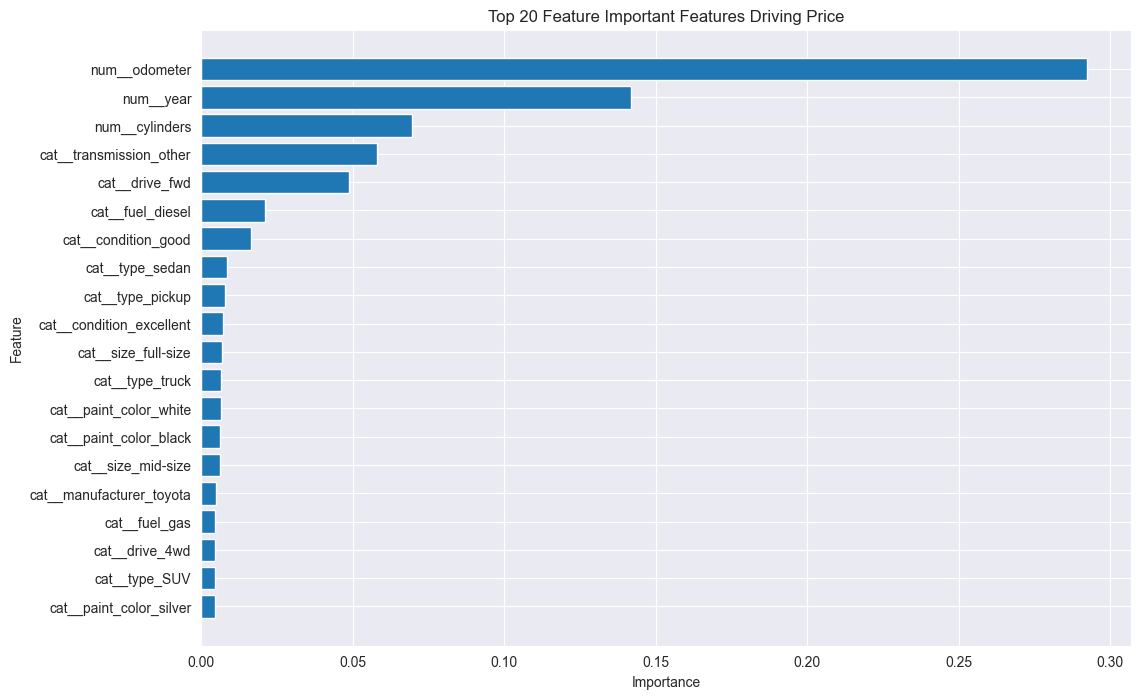

In [126]:

# Extract feature importances from the Bagging Regressor
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.named_steps['regressor'].estimators_
], axis=0)

# Get the feature names
feature_names = bagging_model.named_steps['preprocessor'].get_feature_names_out()

# Sanitize feature names by replacing special characters
sanitized_feature_names = [name.replace('$', '').replace('%', '').replace('&', 'and') for name in feature_names]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': sanitized_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top N most important features
N = 20
top_features_df = feature_importance_df.head(N)

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Important Features Driving Price')
plt.gca().invert_yaxis()
plt.show()


##  Geographic Influence

The box plots illustrate the predicted prices of used cars across different states and regions. These visualizations help identify how geographic factors influence car prices, which can provide actionable insights for inventory management and pricing strategies.

#### Key Findings:
The first plot shows the predicted prices of used cars across the top 20 states:

##### Variation Across States:

There is noticeable variation in predicted car prices across different states.
States like CA, FL, and NY show higher median prices, indicating that cars tend to be priced higher in these states.
Conversely, states like NC, TN, and PA show lower median prices, suggesting more affordable car markets.

###### Interquartile Range (IQR) and Outliers:

The length of the boxes represents the IQR, showing the middle 50% of the data.
States with longer boxes, like TX and OH, indicate a wider range of car prices.
States with numerous outliers, such as NY and CA, suggest that there are occasional extremely high car prices, possibly due to luxury or high-demand models.
Predicted Prices by Region
The second plot shows the predicted prices of used cars across the top 20 regions:

##### Regional Differences:

Regions like New York City, Las Vegas, and Houston have higher median prices, reflecting higher market values in these areas.
Regions such as Stockton and Cleveland show lower median prices, indicating more affordable car markets.

###### Spread and Outliers:

Similar to the state-level analysis, regions with a larger spread in the boxes, such as Philadelphia and Boston, indicate diverse pricing within those markets.
The presence of outliers in regions like New York City and Washington, DC suggests occasional high-value car sales.

In [ ]:
# Assuming 'region' and 'state' are the columns for geographic data
region_column = 'region'  # Replace with actual region column name
state_column = 'state'    # Replace with actual state column name

# Combine geographic columns with the training and test datasets
X_train_geo = pd.concat([X_train, vehicles_df[[region_column, state_column]].loc[X_train.index]], axis=1)
X_test_geo = pd.concat([X_test, vehicles_df[[region_column, state_column]].loc[X_test.index]], axis=1)

# Define numerical and categorical features
numerical_features = X_train_geo.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_geo.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove(region_column)
categorical_features.remove(state_column)

# Encode categorical geographic features
preprocessor_with_geo = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features + [region_column, state_column])
    ])

# Define the model pipeline with the new preprocessor
bagging_model_geo = Pipeline(steps=[
    ('preprocessor', preprocessor_with_geo),
    ('regressor', BaggingRegressor(
        estimator=DecisionTreeRegressor(
            random_state=42,
            max_depth=30,
            min_samples_split=10,
            min_samples_leaf=2
        ),
        n_estimators=20,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit the model
bagging_model_geo.fit(X_train_geo, y_train)

# Predict and evaluate the model
y_pred_geo = bagging_model_geo.predict(X_test_geo)
mse_geo = mean_squared_error(y_test, y_pred_geo)
rmse_geo = np.sqrt(mse_geo)
r2_geo = r2_score(y_test, y_pred_geo)

print(f'Bagging Model with Geographic Data: MSE={mse_geo}, RMSE={rmse_geo}, R²={r2_geo}')

# Analyze the impact of geography
geography_impact_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_geo,
    'Region': vehicles_df.loc[X_test.index, region_column],
    'State': vehicles_df.loc[X_test.index, state_column]
})


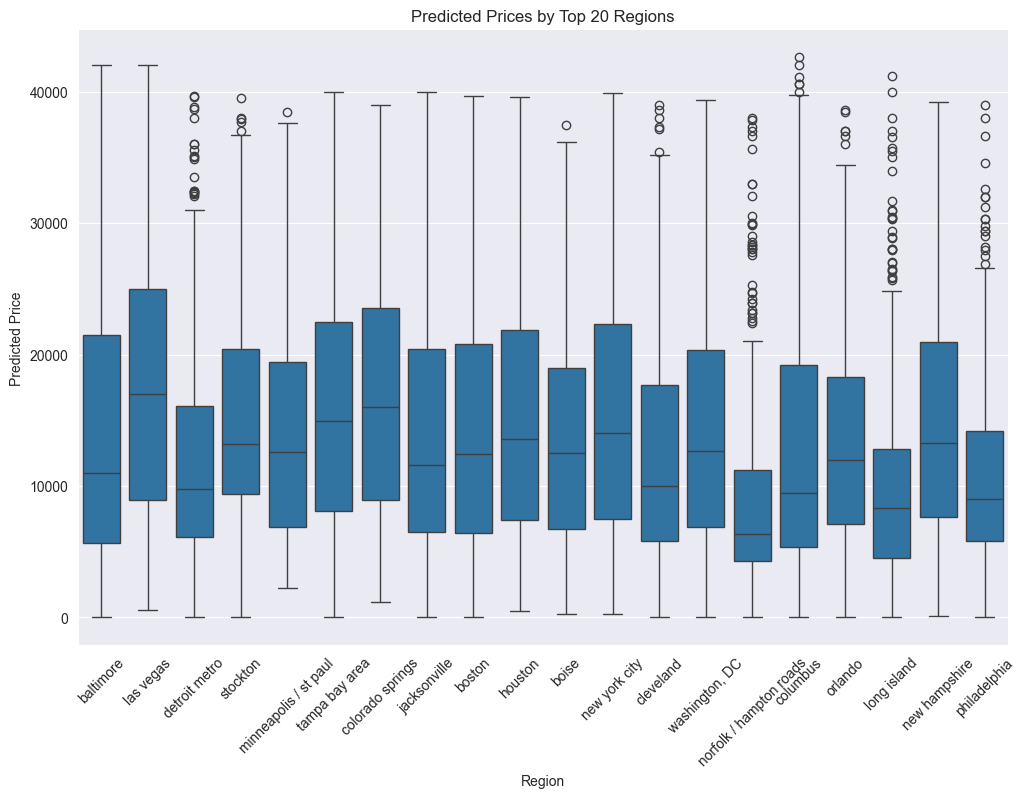

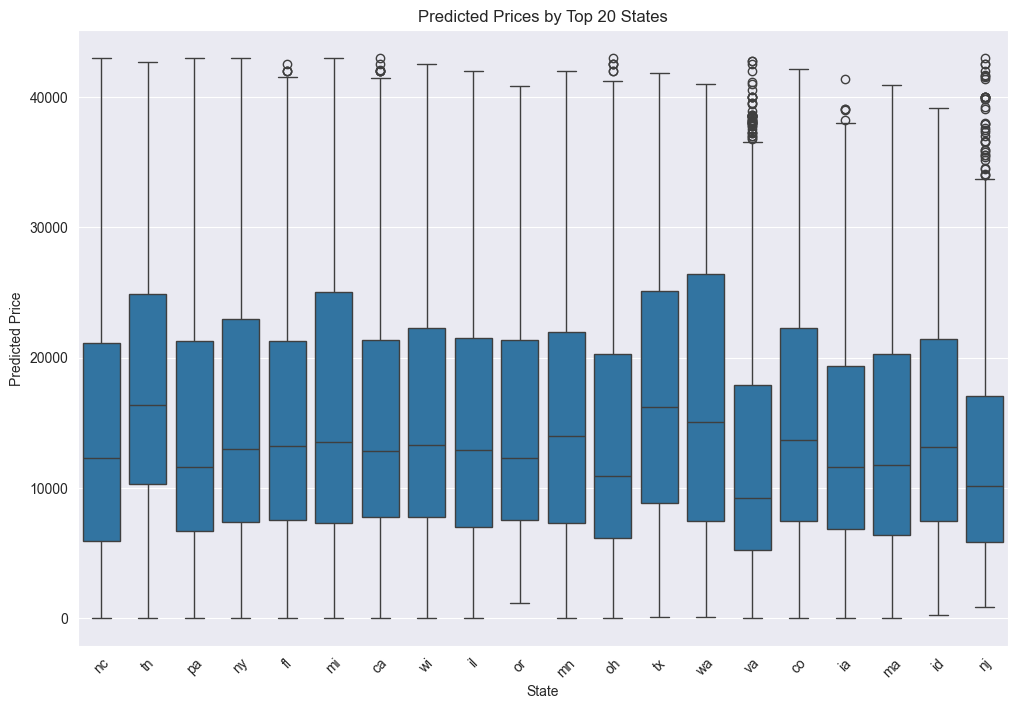

In [123]:

# Reduce the number of categories by focusing on the top 20 regions by frequency
top_regions = geography_impact_df['Region'].value_counts().head(20).index
top_regions_df = geography_impact_df[geography_impact_df['Region'].isin(top_regions)]

# Plot predicted prices by region for top 20 regions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Predicted Price', data=top_regions_df)
plt.title('Predicted Prices by Top 20 Regions')
plt.xticks(rotation=45)
plt.show()

# Reduce the number of categories by focusing on the top 20 states by frequency
top_states = geography_impact_df['State'].value_counts().head(20).index
top_states_df = geography_impact_df[geography_impact_df['State'].isin(top_states)]

# Plot predicted prices by state for top 20 states
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='Predicted Price', data=top_states_df)
plt.title('Predicted Prices by Top 20 States')
plt.xticks(rotation=45)
plt.show()

### Market Demand Analysis

      manufacturer           model  Average Price  Count  \
4884          ford           f-150   18388.051098   5147   
2781     chevrolet  silverado 1500   19433.008403   3570   
12067          ram            1500   18903.331658   2388   
13310       toyota           camry    9033.928266   2105   
7242         honda          accord    9160.307618   2074   
7403         honda           civic    8893.159685   2029   
8878          jeep        wrangler   17182.454779   1946   
4598          ford          escape   10802.312597   1929   
13954       toyota          tacoma   20155.521353   1803   
2777     chevrolet       silverado   15750.544009   1761   

                 Make and Model  
4884                 ford f-150  
2781   chevrolet silverado 1500  
12067                  ram 1500  
13310              toyota camry  
7242               honda accord  
7403                honda civic  
8878              jeep wrangler  
4598                ford escape  
13954             toyota tacoma  

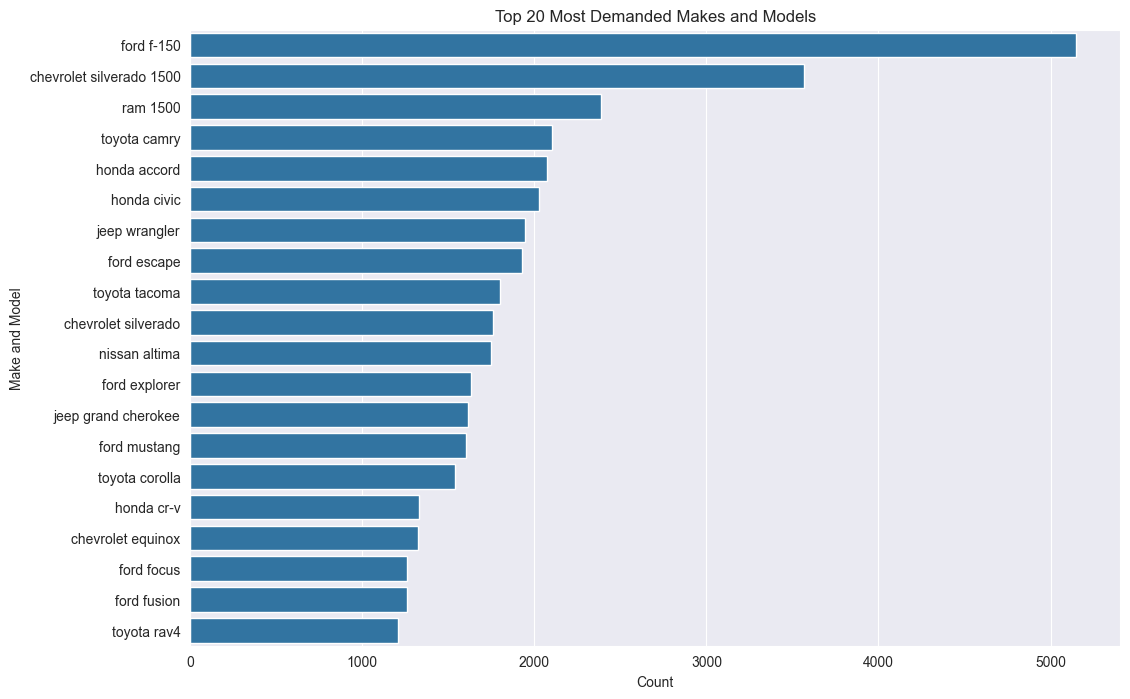

In [125]:
manufacturer_column = 'manufacturer'  # Replace with actual column name
model_column = 'model'  # Replace with actual column name

# Calculate demand and average price for each make and model
market_demand_df = vehicles_df.groupby([manufacturer_column, model_column]).agg({
    'price': ['mean', 'count']
}).reset_index()
market_demand_df.columns = [manufacturer_column, model_column, 'Average Price', 'Count']

# Create a new column for combined manufacturer and model for plotting
market_demand_df['Make and Model'] = market_demand_df[manufacturer_column] + ' ' + market_demand_df[model_column]

# Sort by demand (Count) and display
market_demand_df = market_demand_df.sort_values(by='Count', ascending=False)
print(market_demand_df.head(10))  # Display top 10 makes and models by demand

# Plot market demand
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Make and Model', data=market_demand_df.head(20))
plt.title('Top 20 Most Demanded Makes and Models')
plt.xlabel('Count')
plt.ylabel('Make and Model')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Used Car Price Analysis: Insights for Optimizing Inventory and Pricing

---

## Introduction
Welcome to our presentation on the key factors influencing used car prices. Our goal is to provide actionable insights to help you, as used car dealers, optimize your inventory and pricing strategies. We'll cover feature importance, geographic influence, and market demand.

---

## Feature Importance

Using a Bagging Regressor model, we identified the top 20 features that significantly impact used car prices.

![Top 20 Feature Importance](images/features_driving_price.png)


**Key Features:**
- **Odometer Reading**: Higher mileage generally lowers the car's price.
- **Year**: Newer models tend to have higher prices.
- **Number of Cylinders**: Engine size and performance affect the car's value.
- **Transmission Type**: Automatic or manual transmissions influence car prices differently.
- **Drive Type**: Cars with different drive types (FWD, AWD, etc.) have varying market values.
- **Fuel Type**: Diesel vehicles often have different market values compared to gasoline vehicles.
- **Condition**: The car's condition (e.g., good, excellent) significantly impacts its price.
- **Car Type**: Different types of vehicles (sedans, pickups, SUVs) have different price ranges.



**Business Implications:**
- **Pricing Strategy**: Use these key features to set competitive and profitable prices.
- **Inventory Management**: Focus on acquiring vehicles with desirable features (e.g., low mileage, newer models).

---

## Geographic Influence

Geographic factors play a crucial role in determining used car prices. We analyzed the impact of geographic location on predicted car prices.

**Predicted Prices by State:**
- **Higher Median Prices**: States like California (CA), Florida (FL), and New York (NY) indicate higher market values.
- **Lower Median Prices**: States like North Carolina (NC), Tennessee (TN), and Pennsylvania (PA) suggest more affordable car markets.
- **Price Variation**: States with longer IQRs, like Texas (TX) and Ohio (OH), indicate a wider range of car prices.

![Predicted Prices by State](images/prices_states.png)

**Predicted Prices by Region:**
- **Higher Median Prices**: Regions like New York City, Las Vegas, and Houston reflect higher market values.
- **Lower Median Prices**: Regions such as Stockton and Cleveland indicate more affordable car markets.
- **Price Spread**: Regions with larger spreads, such as Philadelphia and Boston, indicate diverse pricing within those markets.

![Predicted Prices by Region](images/prices_regions.png)

**Business Implications:**
- **Regional Pricing Strategy**: Adjust prices based on regional market values.
- **Inventory Allocation**: Allocate inventory strategically to regions with higher market values.

---

## Market Demand Analysis

We analyzed market demand by evaluating the average price and count of different makes and models.

**Top 20 Most Demanded Makes and Models:**
- **Ford F-150**
- **Chevrolet Silverado 1500**
- **Ram 1500**
- **Toyota Camry**
- **Honda Accord**

These models have the highest counts, indicating strong demand in the market.

![Top 20 Most Demanded Makes and Models](images/make_model_demand.png)

**Business Implications:**
- **Inventory Focus**: Prioritize stocking high-demand makes and models to ensure fast turnover and profitability.
- **Sales Strategy**: Develop targeted promotions for popular models.

---

## Key Takeaways

1. **Pricing Strategy**:
   - Higher median prices in states like CA, FL, and NY suggest that dealerships in these areas can price cars more aggressively.
   - More affordable markets like NC, TN, and PA require competitive pricing to attract buyers.

2. **Inventory Management**:
   - High variability and outliers in regions like NY and CA suggest a demand for luxury or high-demand vehicles. Stock a diverse range of vehicles, including high-end models, in these areas.
   - Affordable markets benefit from a mix of budget-friendly and mid-range vehicles.

3. **Market Positioning**:
   - Regional specialization allows dealerships to tailor their marketing and sales strategies. For example, promoting luxury vehicles in high-value markets and budget-friendly options in more affordable regions.

4. **Sales Strategy**:
   - Customized promotions and discounts can be tailored based on regional pricing insights. Offering financing options in high-value markets can attract customers interested in higher-end models.
   - Analyzing seasonal trends in different regions helps in dynamic pricing strategies to maximize sales during peak times.

---

## Conclusion

By leveraging these insights, you can optimize your inventory, set competitive prices, and tailor your sales strategies to different markets. This will enhance profitability and customer satisfaction, helping you stay ahead in the competitive used car market.

Thank you for your attention. We are open to any questions you might have.
